In [2]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

Задание № 0

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

желаемая точность  Δ  = 3;
дисперсия  𝜎2  = 225;
уровень доверия  𝛽  = 0.95.
Ответ округлите до целого

In [27]:
print(1 - 0.05/2)
print(stats.norm.ppf(0.975)) # для одностороннего интервала
z_a = 2.241 # для двустороннего интервала
n_1 = round((stats.norm.ppf(0.975)*225/3)**2)
print(n_1)
n_2 = round(((2.241)*225/3)**2)
n_2

0.975
1.959963984540054
21608


28249

Задание № 1
Постройте 98% доверительный интервал для среднего значения, если известно, что

объем выборки n = 25;
среднее значение по выборке  𝑥⎯⎯⎯  = 130;
Из достоверных источников известно стандартное отклонение  𝜎=15 .
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого

In [14]:
print(1 - 0.02/2)
z_a = 2.576 #считаем двусторонний интервал
delta = z_a*15/5
a = 130 - delta
b = 130 + delta

L = round(b - a)
L

0.99


15

Задание № 2
Даны две выборки роста мужчин и женщин.

Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен  𝛼  = 0.001.
Покажите различия визуально

t_value: 3.6635841716708892 _pvalue:  0.00024875321033580573


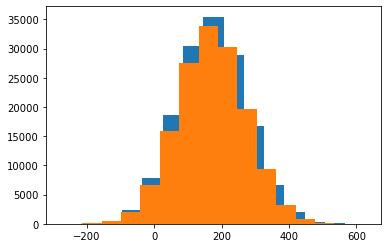

In [8]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170

tvalue, pvalue = stats.ttest_ind(mens, womens)
print('t_value:',tvalue, '_pvalue: ',pvalue)

plt.hist(mens, bins=15);
plt.hist(womens, bins=15);

вывод: получили pvalue:  0.0002 < уровня значимости 𝛼  = 0.001 ???? получается, что различия существенны?

In [ ]:
Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

стандартное отклонение  𝜎=150 ;
уровень доверия  𝛽  = 95%;
Погрешность  Δ=50  рублей.

In [29]:
n = round((stats.norm.ppf(1 - 0.05/2)*150/50)**2) # односторонний интервал
n

35

Задание № 4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( 𝛼=0.05 ).

In [20]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [21]:
oddsratio, pvalue = stats.fisher_exact([[10, 15],[39, 34]])
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

вывод: pvalue = 0.35 > 𝛼=0.05, следовательно волшебник не умеет предсказывать погоду, нулевая гипотеза не опровергнута

Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  𝛽=90%  для выборки:

In [42]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

df = pd.DataFrame(data, index=range(len(data)), columns=['numbers'])

def mean_confidence_interval(data, confidence):
    delta = stats.norm.ppf(1 - (1-confidence)/2)*data.std()/(len(data))**0.5
    a = data.mean() - delta
    b = data.mean() + delta
    return a, b

a, b = mean_confidence_interval(df, 0.9)
a, b


(numbers    6.088751
 dtype: float64,
 numbers    7.168392
 dtype: float64)

# есть ли какой-то параметр, который можно указать для stats.norm.ppf, чтобы получать значания для двустороннего интервала?

Задание № 6
Принадлежат ли выборки A и B одному множеству?

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

t_value: 11.865233896372924 _pvalue:  4.623319592204015e-25


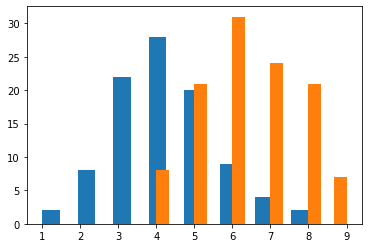

In [43]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

tvalue, pvalue = stats.ttest_ind(A, B)
print('t_value:',tvalue, '_pvalue: ',pvalue)

plt.hist(B, bins=15);
plt.hist(A, bins=15);

вывод: выборки принадлежат разным распределениям

Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное 
распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. 
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?

p-value = 0.03 < 0.05, следовательно можем считать, что нулевая гипотеза опровергнута, распределение считаем ненормальным.

In [ ]:
Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, 
температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными 
и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

-1.95300880485141 0.051284593140469285


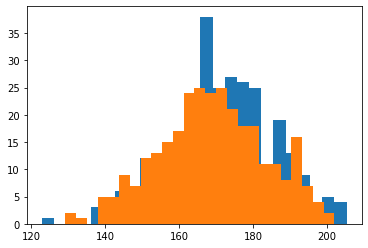

In [45]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
print(t, p_value)

plt.hist(B, bins=25); #Выборка A
plt.hist(A, bins=25);  #Выборка B

p_value = 0.0512 > уровня значимости = 0.05, следовательно значимых различий эффективности препаратов нет